### Loading various libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,classification_report

### Loading the data sets

In [2]:
#loading the data set
from sklearn.datasets import fetch_20newsgroups

#training data set
train_data = fetch_20newsgroups(subset='train',shuffle=True, remove = ('headers', 'footers', 'quotes'))

#testing data set
test_data = fetch_20newsgroups(subset='test',shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [3]:
#checking the length of each data sets
print('Length of training data:',len(train_data['data']))
print('Length of testing data:',len(test_data.data))

Length of training data: 11314
Length of testing data: 7532


In [4]:
#printing all the categories
train_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Training Data Set

In [5]:
#frequency of each category
targets, frequency = np.unique(train_data.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [6]:
#matching the frequency with the categories applying the zip() function after converting the categories into an array
targets_arr = np.array(train_data.target_names)
print(list(zip(targets_arr,frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


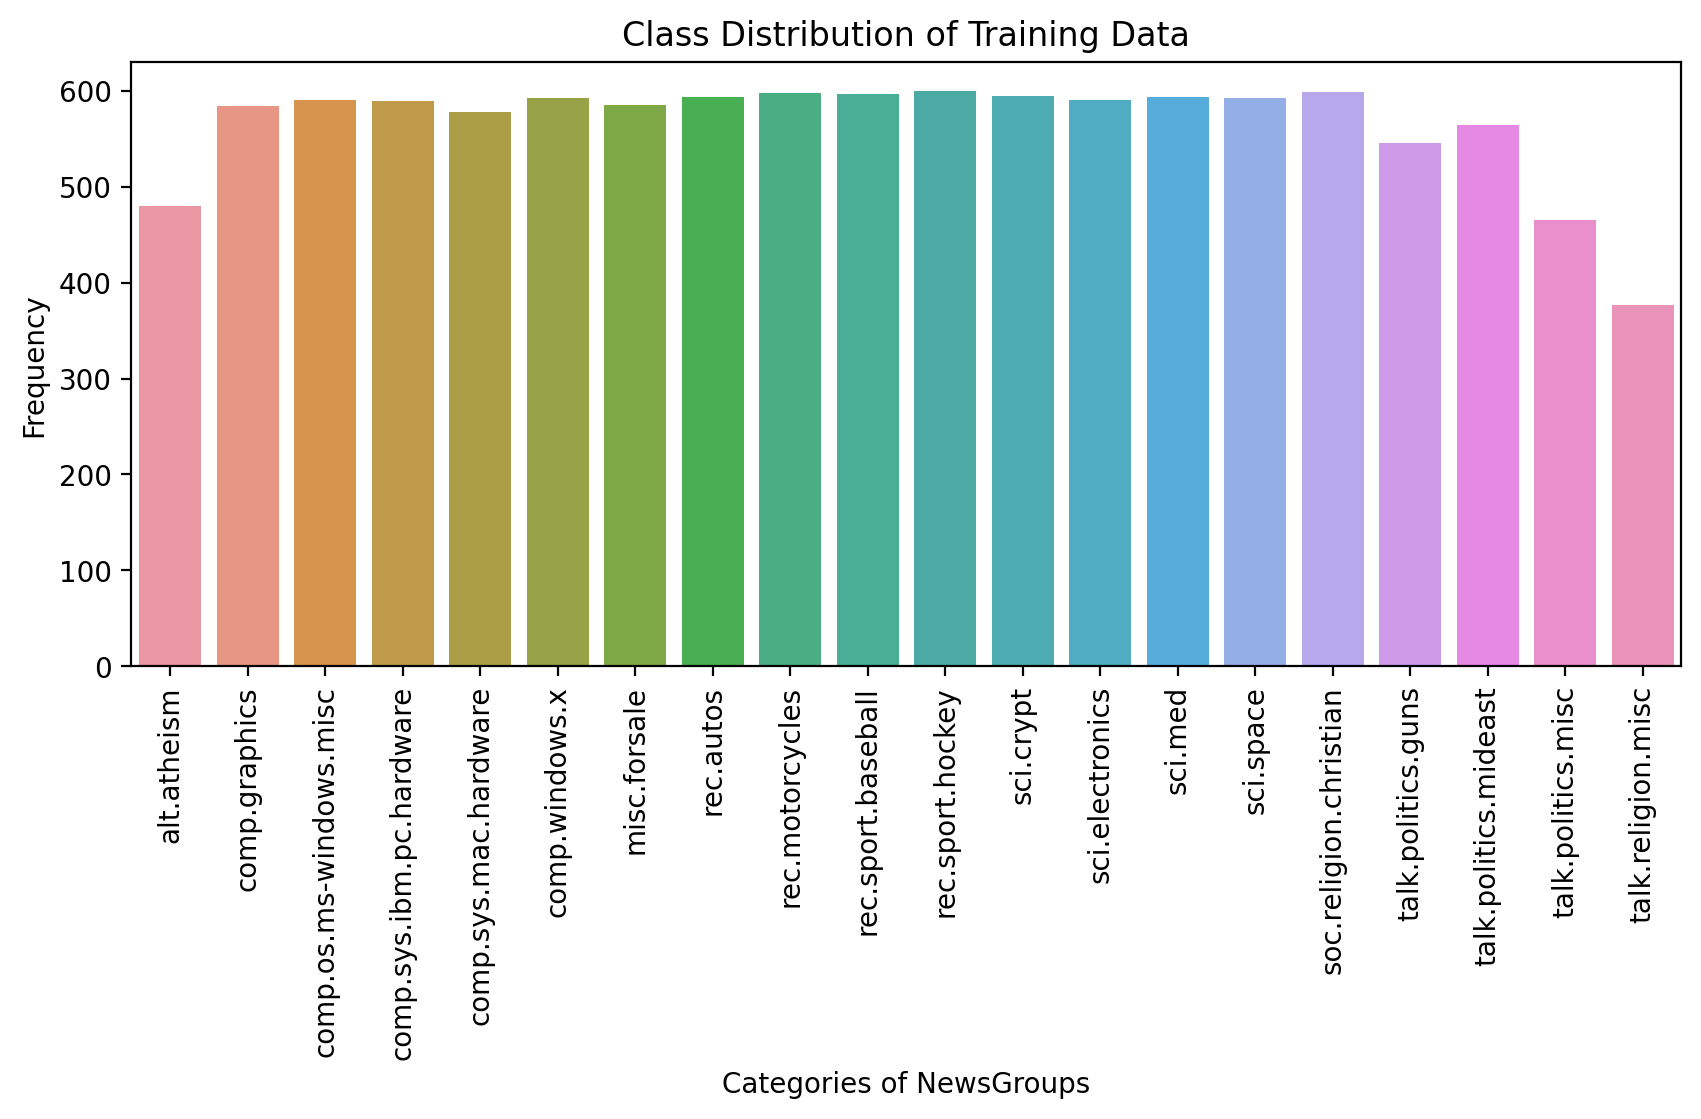

In [7]:
#plotting the class distribution of training data
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y=frequency,x=targets_arr)
plt.xticks(rotation=90)
plt.title('Class Distribution of Training Data')
plt.ylabel('Frequency')
plt.xlabel('Categories of NewsGroups')
plt.show()

#### It can be observed that the training data set is balanced as all of the categories have decent amount of samples.

### Testing Data Set

In [8]:
#frequency of each category
targets, frequency = np.unique(test_data.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393,
        396, 394, 398, 364, 376, 310, 251], dtype=int64))

In [9]:
#matching the frequency with the categories applying the zip() function after converting the categories into an array
targets_arr = np.array(test_data.target_names)
print(list(zip(targets_arr,frequency)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


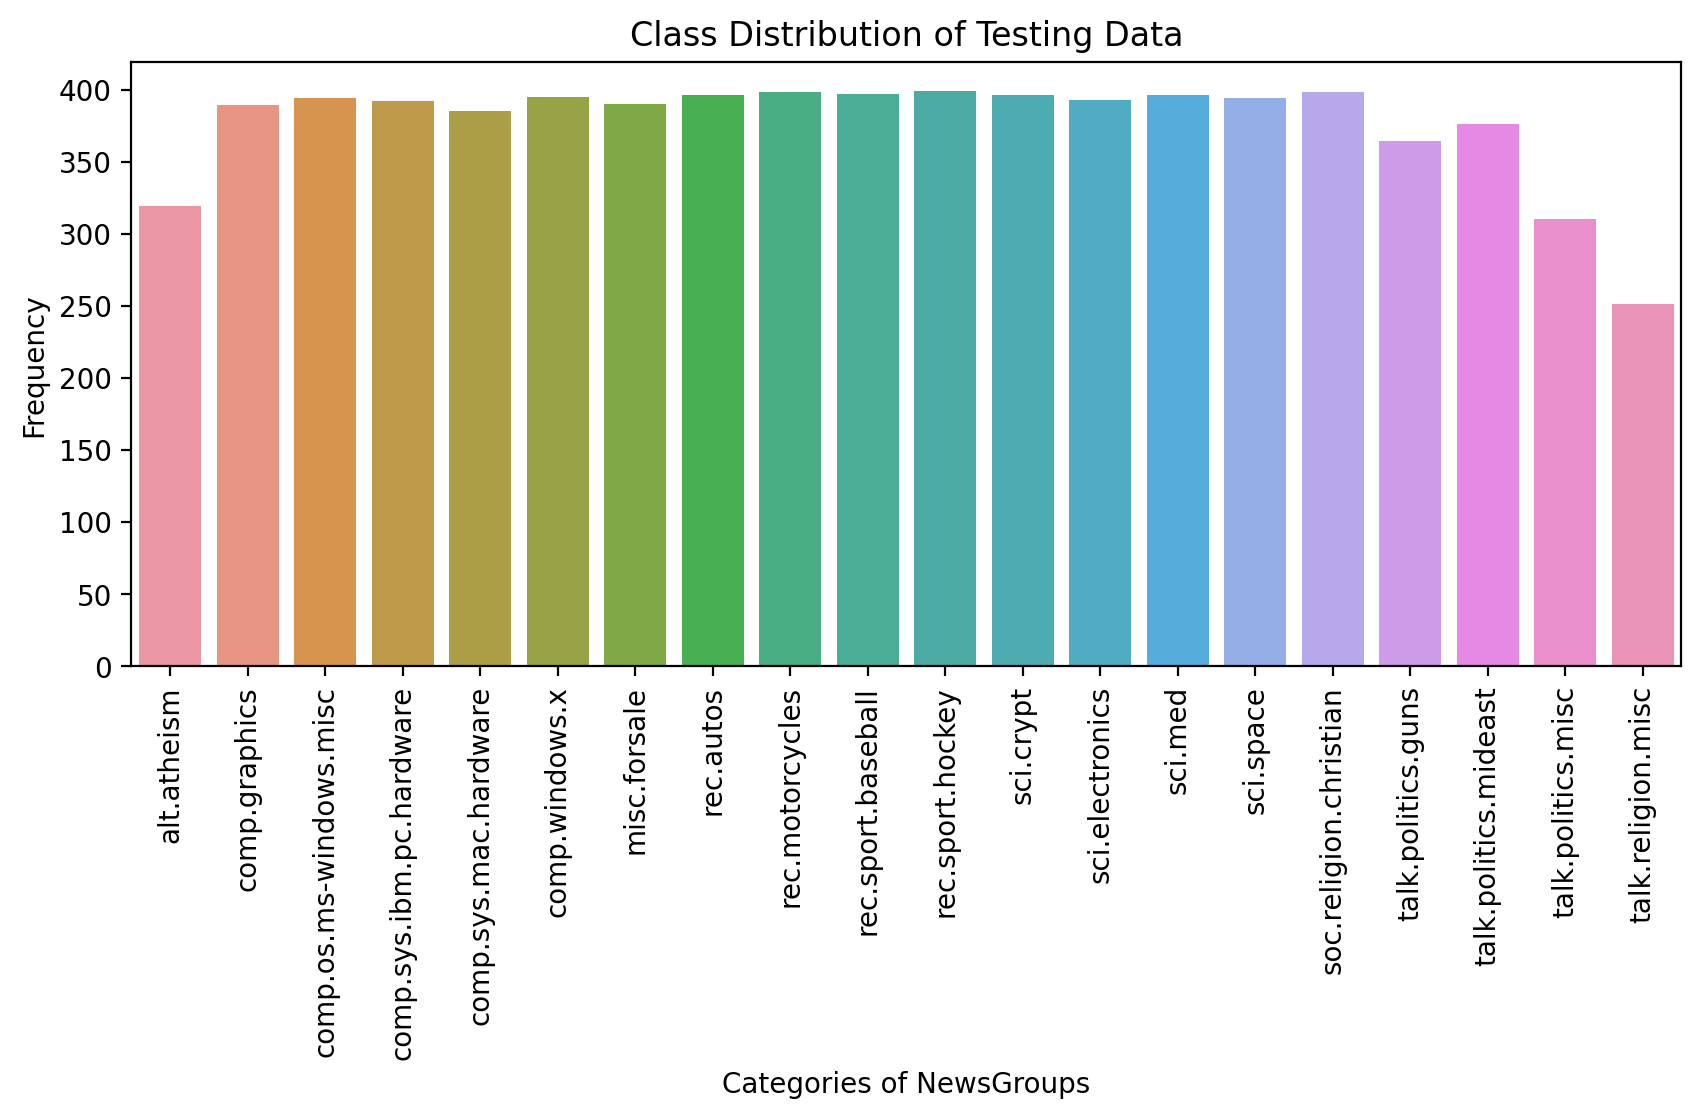

In [10]:
#plotting the class distribution of testing data
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y=frequency,x=targets_arr)
plt.xticks(rotation=90)
plt.title('Class Distribution of Testing Data')
plt.ylabel('Frequency')
plt.xlabel('Categories of NewsGroups')
plt.show()

## Data Preparation:

We will perform data preparation steps such as Tokenization, convert everything to lowercase, remove stopwords,stemming,lemmatizing and convert text data to a vevtor represantion.

In [11]:
#create a data frame for the training data
train_data_df = pd.DataFrame({'data':train_data.data,'target':train_data.target})

In [12]:
train_data_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [13]:
#text preprocessing steps - remove capital letters,punctuation and numbers for the training data
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

train_data_df['data'] = train_data_df.data.map(alphanumeric).map(punc_lower)

In [14]:
#check again the first 5 rows
train_data_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [15]:
#same process for the testing data - creation of a data frame
test_data_df = pd.DataFrame({'data':test_data.data,'target':test_data.target})
test_data_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [16]:
#text preprocessing steps - remove capital letters,punctuation and numbers for the testing data

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

test_data_df['data'] = test_data_df.data.map(alphanumeric).map(punc_lower)
test_data_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


### Count Vectorizer 

In [17]:
#Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english') #remove stop_words

X_train_cv = count_vect.fit_transform(train_data_df.data) #fit_transform: learns the vocabulary and one-hot encodes
X_test_cv = count_vect.transform(test_data_df.data) #transform uses the same vocab and one_hot encodes


In [18]:
#print the shape and type of train_data_cv
print('Shape of X_train_cv',X_train_cv.shape)
print('Type:',type(X_train_cv))

Shape of X_train_cv (11314, 67822)
Type: <class 'scipy.sparse.csr.csr_matrix'>


## TF-IDF Vectorizer

In [19]:
#creating a document-term matrix using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(train_data_df.data) #fit_transform: learns the vocabulary and one-hot encodes
X_test_tfidf = tfidf.transform(test_data_df.data) #transform uses the same vocab and one_hot encode

In [20]:
# print the dimensions of the training set (text messages, terms)
print(X_train_tfidf.shape)
print(type(X_train_tfidf))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


## Classification Models
### We compare Count Vectorizer vs TF-IDF Vectorizer using Naive Bayes model in order to decide which vectorizer performs better.

In [21]:
%%time
#use a Naive Bayes Model 
from sklearn.naive_bayes import MultinomialNB

nb_cv = MultinomialNB()

#train the model
y_train_cv = train_data_df.target
nb_cv.fit(X_train_cv,y_train_cv)

CPU times: total: 78.1 ms
Wall time: 85 ms


MultinomialNB()

In [22]:
#calculate model's performance on test data (data that the model has never seen before)
preds_nb_cv = nb_cv.predict(X_test_cv)
preds_nb_cv #the output is all of the predictions

array([ 7,  1, 15, ..., 15,  3, 15])

In [23]:
#evaluation metrics
from sklearn.metrics import classification_report,accuracy_score

y_test_cv = test_data_df.target
print('Accuracy score with Count Vectorizer:',accuracy_score(y_test_cv,preds_nb_cv))
print('Classification Report:','\n', classification_report(y_test_cv,preds_nb_cv))

Accuracy score with Count Vectorizer: 0.6399362719065321
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.36      0.45       319
           1       0.57      0.70      0.63       389
           2       0.67      0.01      0.02       394
           3       0.50      0.71      0.58       392
           4       0.72      0.58      0.64       385
           5       0.58      0.80      0.67       395
           6       0.85      0.66      0.75       390
           7       0.82      0.70      0.76       396
           8       0.90      0.65      0.75       398
           9       0.93      0.76      0.84       397
          10       0.58      0.92      0.71       399
          11       0.58      0.78      0.66       396
          12       0.67      0.49      0.57       393
          13       0.83      0.79      0.81       396
          14       0.76      0.75      0.76       394
          15       0.48      0.90      0.63       398

In [24]:
%%time
#use a Naive Bayes Model, this time with tfidf data 
from sklearn.naive_bayes import MultinomialNB

nb_tfidf = MultinomialNB()

#train the model
y_train_tfidf = train_data_df.target
nb_tfidf.fit(X_train_tfidf,y_train_tfidf)

CPU times: total: 78.1 ms
Wall time: 78 ms


MultinomialNB()

In [25]:
#calculate model's performance on test data (data that the model has never seen before)
preds_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
preds_nb_tfidf #the output is all of the predictions

array([ 7,  1, 15, ...,  9,  3, 15])

In [26]:
#evaluation metrics
from sklearn.metrics import classification_report,accuracy_score

y_test_tfidf = test_data_df.target
print('Accuracy score with TF-IDF Vectorizer:',accuracy_score(y_test_tfidf,preds_nb_tfidf))
print('Classification Report:','\n', classification_report(y_test_tfidf,preds_nb_tfidf))

Accuracy score with TF-IDF Vectorizer: 0.6751194901752523
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.19      0.31       319
           1       0.66      0.68      0.67       389
           2       0.67      0.60      0.63       394
           3       0.56      0.73      0.63       392
           4       0.75      0.64      0.69       385
           5       0.80      0.76      0.78       395
           6       0.80      0.75      0.77       390
           7       0.84      0.71      0.77       396
           8       0.85      0.73      0.79       398
           9       0.92      0.81      0.86       397
          10       0.57      0.94      0.71       399
          11       0.59      0.80      0.68       396
          12       0.69      0.52      0.59       393
          13       0.88      0.76      0.81       396
          14       0.78      0.75      0.76       394
          15       0.38      0.92      0.54       39

**It can be observed that using tfidf vectorizer, the model's performance is slightly better.**

## Using Pipeline to do the modeling
### I. Not using Stemming and Lemmatization
### 1. Terms in TF-IDF Vectorizer are unigrams (single words)

With TfidfVectorizer we can extract 'Bag Of Words' from the texts and apply TF-IDF (term frequency-inverse document frequency) weights. Experimentaly, we found out that applying sublinear tf scaling (1+log(tf)) enhance overall results. We first extract only unigrams from the text to 'feed' the vectorizer.

### A. Using Multinomial Naive Bayes Model

In [27]:
%%time

#import the pipeline
from sklearn.pipeline import Pipeline

#performance of naive bayes classifier without stemming and lemmatization
operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',MultinomialNB(alpha=0.1))]) #with alpha=0.1 we have better accuracy of 2% surplus

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.6966277217206586
              precision    recall  f1-score   support

           0       0.67      0.35      0.46       319
           1       0.66      0.70      0.68       389
           2       0.69      0.52      0.59       394
           3       0.57      0.72      0.64       392
           4       0.74      0.66      0.70       385
           5       0.80      0.77      0.79       395
           6       0.83      0.75      0.79       390
           7       0.82      0.73      0.77       396
           8       0.82      0.73      0.77       398
           9       0.92      0.83      0.87       397
          10       0.58      0.94      0.72       399
          11       0.69      0.78      0.73       396
          12       0.69      0.58      0.63       393
          13       0.87      0.79      0.83       396
          14       0.76      0.80      0.78       394
          15       0.48      0.91      0.63       398
          16       0.56      0.75      0.64   

### B. Logistic Regression

In [28]:
%%time 
#performance of LR without stemming and lemmatization

operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',LogisticRegression())])
pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred =  pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.6901221455124801
CPU times: total: 1min 23s
Wall time: 47.3 s


**Performing grid search on the 'penalty' parameter of Logistic Regression Classifier. We get best performance when L2-norm is used in the penalization.**

In [29]:
%%time
operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',LogisticRegression())])
pipe = Pipeline(operations)

param_grid = {'clf__penalty': ('l1', 'l2')}
grid_search = GridSearchCV(pipe,param_grid,scoring='accuracy')
grid_search.fit(train_data_df.data,train_data_df.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, se

CPU times: total: 6min 27s
Wall time: 4min 14s


GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english',
                                                        sublinear_tf=True)),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__penalty': ('l1', 'l2')}, scoring='accuracy')

In [30]:
grid_search.best_params_ #getting the best parameter

{'clf__penalty': 'l2'}

In [31]:
%%time
operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',LogisticRegression(penalty='l2'))]) #default value for penalty
pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.6901221455124801
CPU times: total: 1min 25s
Wall time: 53.7 s


### C. Using Stochastic Gradient Descent Classifier Model

In [32]:
%%time
#performance of stochastic Gradient Descent Classifier Model without stemming and lemmatization

operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',SGDClassifier())])
pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.6976898566117897
CPU times: total: 7.23 s
Wall time: 6.33 s


### D. k Nearest Neighbors Model

In [33]:
%%time
#performance of kNN without stemming and lemmatization

operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',KNeighborsClassifier())])
pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.07089750398300584
CPU times: total: 11.2 s
Wall time: 14.4 s


#### Performing grid search on the 'n_neighbors' and 'weights' parameters of kNN Classifier. We get best performance when n_neighbors is set to 5 and distance weights is used.

In [34]:
%%time
operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',KNeighborsClassifier())])
pipe = Pipeline(operations)

param_grid = {'clf__n_neighbors': [5,10,50,100,200],
             'clf__weights': ('uniform', 'distance')}
grid_search = GridSearchCV(pipe,param_grid,scoring='accuracy')
grid_search.fit(train_data_df.data,train_data_df.target)

CPU times: total: 3min 25s
Wall time: 10min 24s


GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english',
                                                        sublinear_tf=True)),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [5, 10, 50, 100, 200],
                         'clf__weights': ('uniform', 'distance')},
             scoring='accuracy')

In [35]:
grid_search.best_params_ #getting the best parameters

{'clf__n_neighbors': 5, 'clf__weights': 'distance'}

In [36]:
%%time
operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',KNeighborsClassifier(n_neighbors=5,weights='distance'))])
pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.08576739245884227
CPU times: total: 7.83 s
Wall time: 8.36 s


### Elbow Method for Choosing Reasonable K Values

In [37]:
test_error_rates = []


for k in range(1,30):
    operations = ([('vect',TfidfVectorizer(stop_words='english',sublinear_tf=True)),
               ('clf',KNeighborsClassifier(n_neighbors=k))])
    pipe = Pipeline(operations)
    pipe.fit(train_data_df.data,train_data_df.target)
    pipe_pred = pipe.predict(test_data_df.data)
    
    test_error = 1 - accuracy_score(test_data_df.target,pipe_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

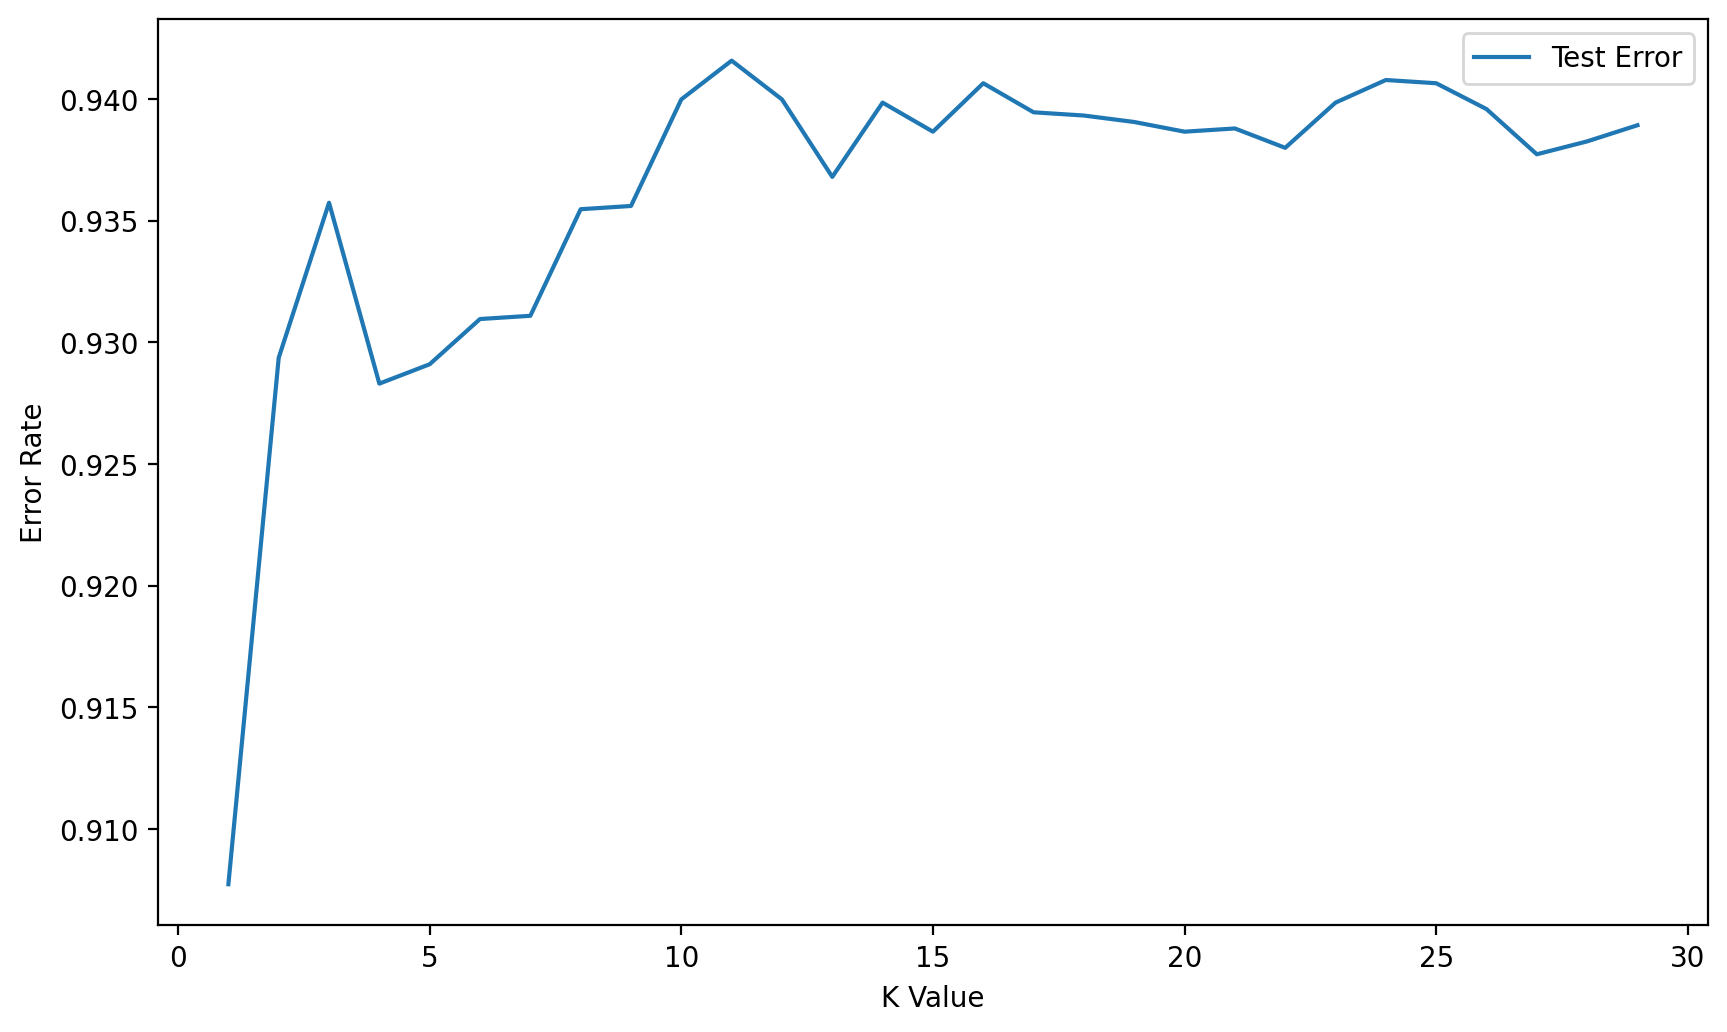

In [38]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values
Now we will extract unigrams as well as bigrams from the text to form the TF-IDF vectorizer.

### A. Using Multinominal Naive Bayes Model

In [39]:
%%time

#performance of naive bayes classifier without stemming and lemmatization,and ngram_range=(1,2)
operations = ([('vect',TfidfVectorizer(stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf',MultinomialNB(alpha=0.1))]) 

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.6919808815719597
CPU times: total: 11.3 s
Wall time: 12 s


### B. Using Logistic Regression Model

In [40]:
%%time

#performance of LR without stemming and lemmatization, and ngram_range=(1,2)
operations = ([('vect',TfidfVectorizer(stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf',LogisticRegression())]) 

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.6834838024429103
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       319
           1       0.60      0.66      0.63       389
           2       0.64      0.63      0.64       394
           3       0.65      0.68      0.67       392
           4       0.73      0.68      0.70       385
           5       0.78      0.74      0.76       395
           6       0.76      0.81      0.78       390
           7       0.77      0.70      0.73       396
           8       0.50      0.79      0.61       398
           9       0.81      0.82      0.82       397
          10       0.90      0.89      0.90       399
          11       0.80      0.70      0.75       396
          12       0.62      0.53      0.57       393
          13       0.83      0.73      0.78       396
          14       0.72      0.75      0.73       394
          15       0.48      0.88      0.62       398
          16       0.58      0.73      0.64   

### C. Using Stochastic Gradient Descent Classifier Model

In [41]:
%%time

#performance of Stochastic Gradient Descent Classifier Model without stemming and lemmatization, and ngram_range=(1,2)
operations = ([('vect',TfidfVectorizer(stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf',SGDClassifier())]) 

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.7033988316516198
CPU times: total: 19.3 s
Wall time: 16.8 s


### D. Using k Nearest Neighbors Model

In [42]:
%%time

#performance of Knn without stemming and lemmatization, and ngram_range=(1,2)
operations = ([('vect',TfidfVectorizer(stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf',KNeighborsClassifier(n_neighbors=5,weights='distance'))]) 
pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

Accuracy Score: 0.07939458311205523
CPU times: total: 14.6 s
Wall time: 15.7 s


### II. Using stemming

Now we'll use stemming technique, i.e. cutting the words to their root form. We use Snowball english stemmer algorithm from the nltk package. We define a class to represent the Snowball stemmer as follows.


In [43]:
stemmer = SnowballStemmer('english', ignore_stopwords=True)

class StemmedTfidfVectorizer(TfidfVectorizer):
    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\bryan/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\bryan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### 1.Terms in TF-IDF are unigrams (single words)
First we will apply stemming to extract only unigrams from text data to form the vectorizer.
### A. Multinomial Naive Bayes Model

In [ ]:
%%time 
#performance of NB classifier with stemming

operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)),
               ('clf', MultinomialNB(alpha=0.1))])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### B. Logistic Regression 

In [ ]:
%%time 
#performance of LR classifier with stemming

operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)),
               ('clf', LogisticRegression())])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### C. Using Stochastic Gradient Descent Classifier Model


In [ ]:
%%time 
#performance of SGDClassifier with stemming

operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)),
               ('clf', SGDClassifier())])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### D. k Nearest Neighbors Model

In [ ]:
%%time 
#performance of kNN with stemming

operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)),
               ('clf', KNeighborsClassifier(n_neighbors=5,weights='distance'))])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values
Now we will extract unigrams as well as bigrams from the text to form the TF-IDF vectorizer.

### A. Multinomial Naive Bayes Model

In [ ]:
%%time
# Performance of NB Classifier with Stemming, and ngram_range = (1,2)
operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf', MultinomialNB(alpha=0.1))])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### B. Logistic Regression

In [ ]:
%%time
# Performance of LR with Stemming, and ngram_range = (1,2)
operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf', LogisticRegression())])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### C. Using Stochastic Gradient Descent Classifier Model

In [ ]:
%%time 
# Performance of SGDClassifier with Stemming, and ngram_range = (1,2)

operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf', SGDClassifier())])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
print(classification_report(test_data_df.target,pipe_pred))

In [ ]:
print(confusion_matrix(test_data_df.target,pipe_pred))   #NOT VERY HELPFUL

In [ ]:
#Confusion matrix display for better visual results
cm = confusion_matrix(test_data_df.target,pipe_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=train_data.target_names)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

### D. k Nearest Neighbors Model

In [ ]:
%%time 
#performance of kNN with stemming AND ngram_range=(1,2)

operations = ([('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
               ('clf', KNeighborsClassifier(n_neighbors=5,weights='distance'))])

pipe = Pipeline(operations)
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### III. Using Lemmatization
Now we apply lemmatization, i.e. getting grammatically correct normal form of the word with the use of morphology. We will use WordNetLemmatizer from nltk package and part-of-speech word tagging. We define the class LemmaTokenizer as follows.

In [ ]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

### A. Using Multinominal Naive Bayes Model

In [ ]:
%%time
# Performance of NB Classifier with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)),
                 ('clf', MultinomialNB(alpha=0.1))])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### B. Using Logistic Regression Model


In [ ]:
%%time
# Performance of LR with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)),
                 ('clf', LogisticRegression())])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### C. Using Stochastic Gradient Descent Classifier Model

In [ ]:
%%time
# Performance of SGDClassifier with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)),
                 ('clf', SGDClassifier())])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### D.  Using k Nearest Neighbors Model

In [ ]:
%%time
# Performance of kNN with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)),
                 ('clf', KNeighborsClassifier(n_neighbors=5,weights='distance'))])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values
Now we will extract unigrams as well as bigrams from the text to form the TF-IDF vectorizer.

### A. Using Multinominal Naive Bayes Model

In [ ]:
%%time
# Performance of NB Classifier with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
                 ('clf', MultinomialNB(alpha=0.1))])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### B. Using Logistic Regression Model

In [ ]:
%%time
# Performance of LR with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
                 ('clf', LogisticRegression())])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))

### C. Using Stochastic Gradient Descent Classifier Model


In [ ]:
%%time
# Performance of LinearSVC with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
                 ('clf', SGDClassifier())])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
print(classification_report(test_data_df.target,pipe_pred))


### D. Using k Nearest Neighbors Model

In [ ]:
%%time
# Performance of kNN with Lemmatization
pipe = Pipeline([('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1,2),binary=True,sublinear_tf=True)),
                 ('clf', KNeighborsClassifier(n_neighbors=5,weights='distance'))])
                 
pipe.fit(train_data_df.data,train_data_df.target)
pipe_pred = pipe.predict(test_data_df.data)
print('Accuracy Score:',accuracy_score(test_data_df.target,pipe_pred))
#print(classification_report(test_data_df.target,pipe_pred))